In [1]:
#https://colab.research.google.com/drive/1_jvL1t9PA2dERKbEm9pCnBS0sbW7B1AW?usp=sharing#scrollTo=QwEdnf3UdKda

In [2]:
import re
import os
from tqdm import tqdm
import csv
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer


In [3]:
#stopword removing
import nltk
# download all 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[n

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreak

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data

True

In [4]:
!pip install convokit
# spacy setup
!python -m spacy download en_core_web_sm
# nltk setup
import nltk
nltk.download('punkt')

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB ? eta -:--:--
                                             0.0/12.8 MB 435.7 kB/s eta 0:00:30
                                             0.1/12.8 MB 491.5 kB/s eta 0:00:26
                                             0.2/12.8 MB 833.5 kB/s eta 0:00:16
                                             0.2/12.8 MB 888.4 kB/s eta 0:00:15
                                              0.3/12.8 MB 1.1 MB/s eta 0:00:12
     -                                        0.4/12.8 MB 1.3 MB/s eta 0:00:10
     -                                        0.5/12.8 MB 1.4 MB/s eta 0:00:09
     -                                        0.6/12.8 MB 1.5 MB/s eta 0:00:09
     --                                       0.7/12.8 MB 1.5 MB/s eta 0:00:09
     --                                       0.8/12.8 MB 1.5 MB/s eta 0:00:08
     --                                       0.9/12.8 MB 1.6 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
#https://convokit.cornell.edu/documentation/movie.html

In [7]:
from tqdm import tqdm
from convokit import Corpus, Speaker, Utterance
from collections import defaultdict

In [8]:
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

In [9]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [134]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [149]:
# you can ignore this
utt_df = corpus.get_utterances_dataframe().drop(columns=['vectors'])
convo_df = corpus.get_conversations_dataframe().drop(columns=['vectors'])
speaker_df = corpus.get_speakers_dataframe().drop(columns=['vectors'])

In [156]:
new_corpus = Corpus.from_pandas(utterances_df=utt_df, speakers_df=speaker_df, conversations_df=convo_df)

ID column is not present in utterances dataframe, generated ID column from dataframe index...
ID column is not present in conversations dataframe, generated ID column from dataframe index...
ID column is not present in speakers dataframe, generated ID column from dataframe index...


304713it [01:00, 5063.77it/s]


In [164]:
speaker_df

,character_name,movie_idx,movie_name,gender,credit_pos,id
id,,,,,,
u0,BIANCA,m0,10 things i hate about you,f,4,u0
u2,CAMERON,m0,10 things i hate about you,m,3,u2
u3,CHASTITY,m0,10 things i hate about you,?,?,u3
u4,JOEY,m0,10 things i hate about you,m,6,u4
u5,KAT,m0,10 things i hate about you,f,2,u5
...,...,...,...,...,...,...
u9029,CREALOCK,m616,zulu dawn,?,?,u9029
u9033,STUART SMITH,m616,zulu dawn,?,?,u9033
u9028,COGHILL,m616,zulu dawn,?,?,u9028


In [163]:
utt_df

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,id
id,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",L1045
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",L1044
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",L985
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",L984
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",L925
...,...,...,...,...,...,...,...,...
L666371,None,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"[{'rt': 2, 'toks': [{'tok': 'Lord', 'tag': 'NN...",L666371
L666370,None,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",L666370
L666369,None,"Your orders, Mr Vereker?",u9030,None,L666369,m616,"[{'rt': 1, 'toks': [{'tok': 'Your', 'tag': 'PR...",L666369


In [ ]:
utt_df.rename(index=str, columns={'id': 'convo_id'}, inplace=True)

In [167]:
convo_df

,movie_idx,movie_name,release_year,rating,votes,genre,id
id,,,,,,,
L1044,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L1044
L984,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L984
L924,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L924
L870,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L870
L866,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L866
...,...,...,...,...,...,...,...
L666324,m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w...",L666324
L666262,m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w...",L666262
L666520,m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w...",L666520


In [187]:
convo_df.rename(index=str, columns={'id': 'convo_id'}, inplace=True)

In [188]:
convo_df.head()

,movie_idx,movie_name,release_year,rating,votes,genre,convo_id
id,,,,,,,
L1044,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L1044
L984,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L984
L924,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L924
L870,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L870
L866,m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",L866


In [171]:
convo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83097 entries, L1044 to L666256
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_idx     83097 non-null  object
 1   movie_name    83097 non-null  object
 2   release_year  83097 non-null  object
 3   rating        83097 non-null  object
 4   votes         83097 non-null  object
 5   genre         83097 non-null  object
 6   id            83097 non-null  object
dtypes: object(7)
memory usage: 5.1+ MB


In [172]:
utt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304713 entries, L1045 to L666256
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        0 non-null       object
 1   text             304713 non-null  object
 2   speaker          304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   id               304713 non-null  object
dtypes: object(8)
memory usage: 20.9+ MB


In [190]:
df=utt_df.set_index('id').join(convo_df.set_index('convo_id'),how='left')

In [191]:
df

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,movie_idx,movie_name,release_year,rating,votes,genre
id,,,,,,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",NaN,NaN,NaN,NaN,NaN,NaN
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",NaN,NaN,NaN,NaN,NaN,NaN
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
L666371,None,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"[{'rt': 2, 'toks': [{'tok': 'Lord', 'tag': 'NN...",NaN,NaN,NaN,NaN,NaN,NaN
L666370,None,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",NaN,NaN,NaN,NaN,NaN,NaN
L666369,None,"Your orders, Mr Vereker?",u9030,None,L666369,m616,"[{'rt': 1, 'toks': [{'tok': 'Your', 'tag': 'PR...",m616,zulu dawn,1979,6.40,1911,"['action', 'adventure', 'drama', 'history', 'w..."


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304713 entries, L1045 to L666256
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   timestamp        0 non-null       object
 1   text             304713 non-null  object
 2   speaker          304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   movie_idx        83097 non-null   object
 8   movie_name       83097 non-null   object
 9   release_year     83097 non-null   object
 10  rating           83097 non-null   object
 11  votes            83097 non-null   object
 12  genre            83097 non-null   object
dtypes: object(13)
memory usage: 40.6+ MB


In [176]:
speaker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9035 entries, u0 to u9034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   character_name  9035 non-null   object
 1   movie_idx       9035 non-null   object
 2   movie_name      9035 non-null   object
 3   gender          9035 non-null   object
 4   credit_pos      9035 non-null   object
 5   id              9035 non-null   object
dtypes: object(6)
memory usage: 494.1+ KB


In [177]:
speaker_df

,character_name,movie_idx,movie_name,gender,credit_pos,id
id,,,,,,
u0,BIANCA,m0,10 things i hate about you,f,4,u0
u2,CAMERON,m0,10 things i hate about you,m,3,u2
u3,CHASTITY,m0,10 things i hate about you,?,?,u3
u4,JOEY,m0,10 things i hate about you,m,6,u4
u5,KAT,m0,10 things i hate about you,f,2,u5
...,...,...,...,...,...,...
u9029,CREALOCK,m616,zulu dawn,?,?,u9029
u9033,STUART SMITH,m616,zulu dawn,?,?,u9033
u9028,COGHILL,m616,zulu dawn,?,?,u9028


In [192]:
speaker_df.rename(index=str, columns={'id': 'character_id'}, inplace=True)

In [193]:
speaker_df

,character_name,movie_idx,movie_name,gender,credit_pos,character_id
id,,,,,,
u0,BIANCA,m0,10 things i hate about you,f,4,u0
u2,CAMERON,m0,10 things i hate about you,m,3,u2
u3,CHASTITY,m0,10 things i hate about you,?,?,u3
u4,JOEY,m0,10 things i hate about you,m,6,u4
u5,KAT,m0,10 things i hate about you,f,2,u5
...,...,...,...,...,...,...
u9029,CREALOCK,m616,zulu dawn,?,?,u9029
u9033,STUART SMITH,m616,zulu dawn,?,?,u9033
u9028,COGHILL,m616,zulu dawn,?,?,u9028


In [194]:
speaker_df_2 = speaker_df[[ 'character_name',  'character_id', 'gender']]

In [195]:
speaker_df_2

,character_name,character_id,gender
id,,,
u0,BIANCA,u0,f
u2,CAMERON,u2,m
u3,CHASTITY,u3,?
u4,JOEY,u4,m
u5,KAT,u5,f
...,...,...,...
u9029,CREALOCK,u9029,?
u9033,STUART SMITH,u9033,?
u9028,COGHILL,u9028,?


In [196]:
df_full=df.set_index('speaker').join(speaker_df_2.set_index('character_id'),how='left')

In [197]:
df_full

,timestamp,text,reply_to,conversation_id,meta.movie_id,meta.parsed,movie_idx,movie_name,release_year,rating,votes,genre,character_name,gender
u0,None,They do not!,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f
u0,None,I hope so.,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f
u0,None,Let's go.,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f
u0,None,Okay -- you're gonna need to learn how to lie.,L871,L870,m0,"[{'rt': 4, 'toks': [{'tok': 'Okay', 'tag': 'UH...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f
u0,None,I'm kidding. You know how sometimes you just ...,None,L870,m0,"[{'rt': 2, 'toks': [{'tok': 'I', 'tag': 'PRP',...",m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",BIANCA,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u998,None,-- you got your microwave --,L227495,L227495,m65,"[{'rt': 2, 'toks': [{'tok': '--', 'tag': ':', ...",NaN,NaN,NaN,NaN,NaN,NaN,KATE,f
u999,None,Is it safe to assume that because the death co...,L227594,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Is', 'tag': 'VBZ'...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?
u999,None,What about the report from an eyewitness at th...,L227592,L227588,m65,"[{'rt': 1, 'toks': [{'tok': 'What', 'tag': 'WP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?
u999,None,Are you optimistic about the safety of the hos...,L227590,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Are', 'tag': 'VBP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?


In [198]:
#bacause of join we missed the id , now with this code we take id back
ids = list(df_full.index)
df_full = df_full.reset_index()
df_full['id'] = ids

In [199]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   index            304713 non-null  object
 1   timestamp        0 non-null       object
 2   text             304713 non-null  object
 3   reply_to         221616 non-null  object
 4   conversation_id  304713 non-null  object
 5   meta.movie_id    304713 non-null  object
 6   meta.parsed      304713 non-null  object
 7   movie_idx        83097 non-null   object
 8   movie_name       83097 non-null   object
 9   release_year     83097 non-null   object
 10  rating           83097 non-null   object
 11  votes            83097 non-null   object
 12  genre            83097 non-null   object
 13  character_name   304713 non-null  object
 14  gender           304713 non-null  object
 15  id               304713 non-null  object
dtypes: object(16)
memory usage: 37.2+ MB


In [200]:
df_full

,index,timestamp,text,reply_to,conversation_id,meta.movie_id,meta.parsed,movie_idx,movie_name,release_year,rating,votes,genre,character_name,gender,id
0,u0,None,They do not!,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
1,u0,None,I hope so.,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
2,u0,None,Let's go.,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
3,u0,None,Okay -- you're gonna need to learn how to lie.,L871,L870,m0,"[{'rt': 4, 'toks': [{'tok': 'Okay', 'tag': 'UH...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
4,u0,None,I'm kidding. You know how sometimes you just ...,None,L870,m0,"[{'rt': 2, 'toks': [{'tok': 'I', 'tag': 'PRP',...",m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",BIANCA,f,u0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,None,-- you got your microwave --,L227495,L227495,m65,"[{'rt': 2, 'toks': [{'tok': '--', 'tag': ':', ...",NaN,NaN,NaN,NaN,NaN,NaN,KATE,f,u998
304709,u999,None,Is it safe to assume that because the death co...,L227594,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Is', 'tag': 'VBZ'...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999
304710,u999,None,What about the report from an eyewitness at th...,L227592,L227588,m65,"[{'rt': 1, 'toks': [{'tok': 'What', 'tag': 'WP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999
304711,u999,None,Are you optimistic about the safety of the hos...,L227590,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Are', 'tag': 'VBP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999


In [203]:
df_full.rename(index=str, columns={'id': 'character_id', 'meta.movie_id':  'movie_id' }, inplace=True)

In [204]:
df_full

,index,timestamp,text,reply_to,conversation_id,movie_id,meta.parsed,movie_idx,movie_name,release_year,rating,votes,genre,character_name,gender,character_id
0,u0,None,They do not!,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
1,u0,None,I hope so.,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
2,u0,None,Let's go.,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
3,u0,None,Okay -- you're gonna need to learn how to lie.,L871,L870,m0,"[{'rt': 4, 'toks': [{'tok': 'Okay', 'tag': 'UH...",NaN,NaN,NaN,NaN,NaN,NaN,BIANCA,f,u0
4,u0,None,I'm kidding. You know how sometimes you just ...,None,L870,m0,"[{'rt': 2, 'toks': [{'tok': 'I', 'tag': 'PRP',...",m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']",BIANCA,f,u0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,None,-- you got your microwave --,L227495,L227495,m65,"[{'rt': 2, 'toks': [{'tok': '--', 'tag': ':', ...",NaN,NaN,NaN,NaN,NaN,NaN,KATE,f,u998
304709,u999,None,Is it safe to assume that because the death co...,L227594,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Is', 'tag': 'VBZ'...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999
304710,u999,None,What about the report from an eyewitness at th...,L227592,L227588,m65,"[{'rt': 1, 'toks': [{'tok': 'What', 'tag': 'WP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999
304711,u999,None,Are you optimistic about the safety of the hos...,L227590,L227588,m65,"[{'rt': 0, 'toks': [{'tok': 'Are', 'tag': 'VBP...",NaN,NaN,NaN,NaN,NaN,NaN,KELLY HOUGE,?,u999


In [205]:
df_new = df_full[['character_id','character_name','gender', 'movie_id','movie_name','release_year','conversation_id','reply_to','text']]

In [206]:
df_new

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...
...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...


In [184]:
new_corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [207]:
df_new["movie_id"].value_counts()

m289    1530
m295    1398
m299    1286
m105    1214
m238    1187
        ... 
m456      29
m406      13
m521      13
m270      11
m602       6
Name: movie_id, Length: 617, dtype: int64

In [231]:
df_new['movie_id'].nunique()

617

In [232]:
df_new['character_id'].nunique()

9035

In [233]:
df_new['conversation_id'].nunique()

83097

In [208]:
## Save newdf to csv file-Without tex process
df_new.to_csv('movie_Convokit.csv', index=False)

In [209]:
Movie_df = pd.read_csv("movie_Convokit.csv")

In [210]:
Movie_df

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,NaN,I'm kidding. You know how sometimes you just ...
...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...


In [55]:
##With text Process

In [211]:
Movie_df=df_new

In [212]:
Movie_df.head(5)

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...


# Case Folding & Cleaning Data

In [213]:
# function to clean the tweets 
import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    #remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    text.lower()
    return text

In [214]:
# case folding
temp_movie = Movie_df['text'].str.lower()

In [215]:
temp_movie

0                                              they do not!
1                                                i hope so.
2                                                 let's go.
3            okay -- you're gonna need to learn how to lie.
4         i'm kidding.  you know how sometimes you just ...
                                ...                        
304708                         -- you got your microwave --
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase, does it appear that they are head...
Name: text, Length: 304713, dtype: object

In [216]:
# remove hashtag and mention using regex

temp_movie = temp_movie.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

temp_movie

0                                              they do not!
1                                                i hope so.
2                                                 let's go.
3            okay -- you're gonna need to learn how to lie.
4         i'm kidding.  you know how sometimes you just ...
                                ...                        
304708                         -- you got your microwave --
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase, does it appear that they are head...
Name: text, Length: 304713, dtype: object

In [217]:
# remove url using regex
temp_movie = temp_movie.apply(lambda x: re.sub(r'http\S+', '', x))
temp_movie

0                                              they do not!
1                                                i hope so.
2                                                 let's go.
3            okay -- you're gonna need to learn how to lie.
4         i'm kidding.  you know how sometimes you just ...
                                ...                        
304708                         -- you got your microwave --
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase, does it appear that they are head...
Name: text, Length: 304713, dtype: object

In [218]:
# remove punctuation
temp_movie = temp_movie.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

temp_movie

0                                               they do not
1                                                 i hope so
2                                                   lets go
3                okay  youre gonna need to learn how to lie
4         im kidding  you know how sometimes you just be...
                                ...                        
304708                              you got your microwave 
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase does it appear that they are headi...
Name: text, Length: 304713, dtype: object

In [219]:
# remove number
temp_movie = temp_movie.apply(lambda x: re.sub(r'\d+', '', x))
temp_movie


0                                               they do not
1                                                 i hope so
2                                                   lets go
3                okay  youre gonna need to learn how to lie
4         im kidding  you know how sometimes you just be...
                                ...                        
304708                              you got your microwave 
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase does it appear that they are headi...
Name: text, Length: 304713, dtype: object

In [220]:
# check null value
temp_movie.isnull().sum()

0

In [221]:
# remove whitespace
temp_movie = temp_movie.apply(lambda x: x.strip())

temp_movie

0                                               they do not
1                                                 i hope so
2                                                   lets go
3                okay  youre gonna need to learn how to lie
4         im kidding  you know how sometimes you just be...
                                ...                        
304708                               you got your microwave
304709    is it safe to assume that because the death co...
304710    what about the report from an eyewitness at th...
304711    are you optimistic about the safety of the hos...
304712    agent chase does it appear that they are headi...
Name: text, Length: 304713, dtype: object

In [222]:
# remove stopword
stop = stopwords.words('english')

temp_movie = temp_movie.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

temp_movie

0                                                          
1                                                      hope
2                                                   lets go
3                           okay youre gonna need learn lie
4         im kidding know sometimes become persona dont ...
                                ...                        
304708                                        got microwave
304709    safe assume death count involved loss life law...
304710    report eyewitness liquor store said one brothe...
304711    optimistic safety hostage took abilene gloria ...
304712                    agent chase appear heading mexico
Name: text, Length: 304713, dtype: object

In [223]:
# lemmatization
lemmatizer = WordNetLemmatizer()

temp_movie = temp_movie.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

temp_movie

0                                                          
1                                                      hope
2                                                    let go
3                           okay youre gonna need learn lie
4         im kidding know sometimes become persona dont ...
                                ...                        
304708                                        got microwave
304709    safe assume death count involved loss life law...
304710    report eyewitness liquor store said one brothe...
304711    optimistic safety hostage took abilene gloria ...
304712                    agent chase appear heading mexico
Name: text, Length: 304713, dtype: object

In [224]:
# tokenization
temp_movie = temp_movie.apply(lambda x: word_tokenize(x))

temp_movie

0                                                        []
1                                                    [hope]
2                                                 [let, go]
3                  [okay, youre, gon, na, need, learn, lie]
4         [im, kidding, know, sometimes, become, persona...
                                ...                        
304708                                     [got, microwave]
304709    [safe, assume, death, count, involved, loss, l...
304710    [report, eyewitness, liquor, store, said, one,...
304711    [optimistic, safety, hostage, took, abilene, g...
304712              [agent, chase, appear, heading, mexico]
Name: text, Length: 304713, dtype: object

In [225]:
# temp to df content_token
Movie_df['text_movie_token'] = temp_movie
Movie_df

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_23484\3942213063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_df['text_movie_token'] = temp_movie


,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[]
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,[hope]
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"[let, go]"
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"[okay, youre, gon, na, need, learn, lie]"
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...,"[im, kidding, know, sometimes, become, persona..."
...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"[got, microwave]"
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"[safe, assume, death, count, involved, loss, l..."
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"[report, eyewitness, liquor, store, said, one,..."
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"[optimistic, safety, hostage, took, abilene, g..."


In [226]:
# cleaning the tweets using clean_tweet function, ı did it again  because with tokenizer , ı lost some conversation.

Movie_df['clean_text'] = Movie_df['text'].apply(lambda x: cleanTxt(x))

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_23484\1383294180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_df['clean_text'] = Movie_df['text'].apply(lambda x: cleanTxt(x))


In [227]:
Movie_df

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],They do not
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,[hope],I hope so
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"[let, go]",Let s go
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"[okay, youre, gon, na, need, learn, lie]",Okay you re gonna need to learn how to lie
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...,"[im, kidding, know, sometimes, become, persona...",I m kidding You know how sometimes you just ...
...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"[got, microwave]",you got your microwave
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"[safe, assume, death, count, involved, loss, l...",Is it safe to assume that because the death co...
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"[report, eyewitness, liquor, store, said, one,...",What about the report from an eyewitness at th...
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"[optimistic, safety, hostage, took, abilene, g...",Are you optimistic about the safety of the hos...


In [228]:
# lower casing clean_tweet column

Movie_df['clean_text'] = Movie_df['clean_text'].apply(lambda x: x.lower())

Movie_df.head(5)

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_23484\85499845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_df['clean_text'] = Movie_df['clean_text'].apply(lambda x: x.lower())


,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,[hope],i hope so
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"[let, go]",let s go
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"[okay, youre, gon, na, need, learn, lie]",okay you re gonna need to learn how to lie
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...,"[im, kidding, know, sometimes, become, persona...",i m kidding you know how sometimes you just ...


In [229]:
Movie_df

,character_id,character_name,gender,movie_id,movie_name,release_year,conversation_id,reply_to,text,text_movie_token,clean_text
0,u0,BIANCA,f,m0,NaN,NaN,L1044,L1044,They do not!,[],they do not
1,u0,BIANCA,f,m0,NaN,NaN,L984,L984,I hope so.,[hope],i hope so
2,u0,BIANCA,f,m0,NaN,NaN,L924,L924,Let's go.,"[let, go]",let s go
3,u0,BIANCA,f,m0,NaN,NaN,L870,L871,Okay -- you're gonna need to learn how to lie.,"[okay, youre, gon, na, need, learn, lie]",okay you re gonna need to learn how to lie
4,u0,BIANCA,f,m0,10 things i hate about you,1999,L870,None,I'm kidding. You know how sometimes you just ...,"[im, kidding, know, sometimes, become, persona...",i m kidding you know how sometimes you just ...
...,...,...,...,...,...,...,...,...,...,...,...
304708,u998,KATE,f,m65,NaN,NaN,L227495,L227495,-- you got your microwave --,"[got, microwave]",you got your microwave
304709,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227594,Is it safe to assume that because the death co...,"[safe, assume, death, count, involved, loss, l...",is it safe to assume that because the death co...
304710,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227592,What about the report from an eyewitness at th...,"[report, eyewitness, liquor, store, said, one,...",what about the report from an eyewitness at th...
304711,u999,KELLY HOUGE,?,m65,NaN,NaN,L227588,L227590,Are you optimistic about the safety of the hos...,"[optimistic, safety, hostage, took, abilene, g...",are you optimistic about the safety of the hos...


In [248]:
# check missing values for each column 
Movie_df.isnull().sum().sort_values(ascending=False)

movie_name          221616
release_year        221616
reply_to             83097
character_id             0
character_name           0
gender                   0
movie_id                 0
conversation_id          0
text                     0
text_movie_token         0
clean_text               0
dtype: int64

In [230]:
## Save newdf to csv file-Without tex process
Movie_df.to_csv('Movie_df_model.csv', index=False)

In [291]:
conversation = Movie_df.groupby(by=['character_name','movie_id'], as_index=False)['conversation_id'].count()

In [292]:
conversation.sort_values(by='conversation_id', ascending=False)

,character_name,movie_id,conversation_id
1900,DANTE,m299,537
633,BEN,m77,489
4083,JOE,m100,472
216,ALVY,m243,467
52,ACE,m289,465
...,...,...,...
1669,CONNIE,m374,3
1681,CONTINENTAL SERGEANT,m157,3
4297,KAM,m272,3
8574,VOICE,m123,3


In [293]:
# check missing values for each column 
conversation.isnull().sum().sort_values(ascending=False)

character_name     0
movie_id           0
conversation_id    0
dtype: int64

In [294]:

conversation_new = conversation[conversation.conversation_id >300]

In [295]:
conversation_new.sort_values(by='conversation_id', ascending=False)

,character_name,movie_id,conversation_id
1900,DANTE,m299,537
633,BEN,m77,489
4083,JOE,m100,472
216,ALVY,m243,467
52,ACE,m289,465
...,...,...,...
2284,DOUG,m251,306
300,ANN,m175,304
3931,JEFFREY,m36,304
112,AL,m100,304


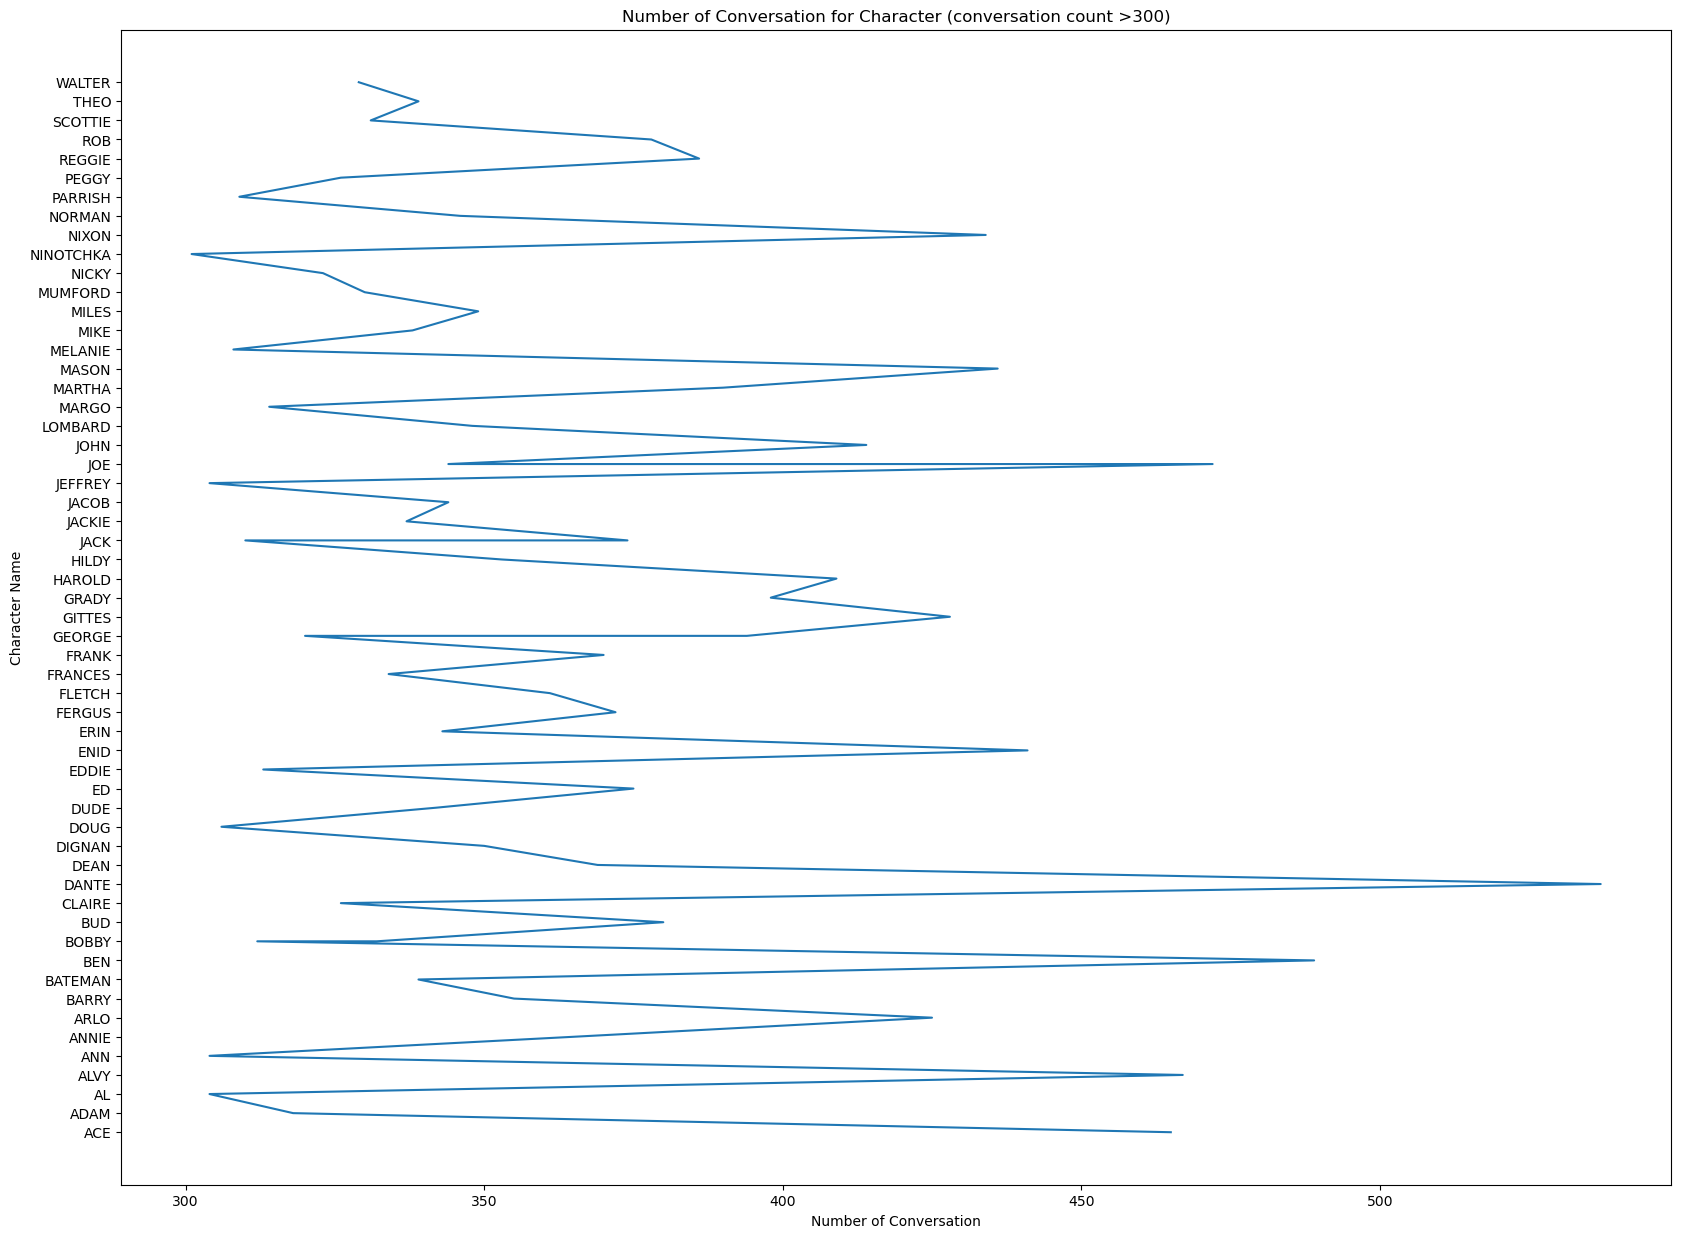

In [296]:

plt.subplots(figsize=(20,15))
plt.plot( conversation_new.conversation_id,conversation_new.character_name)
plt.ylabel('Character Name')
plt.xlabel('Number of Conversation')
plt.title('Number of Conversation for Character (conversation count >300)')
plt.show()